<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20Ensemble%20RandomForest%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required libraries
!pip install xgboost catboost plotly --quiet

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix
import xgboost as xgb
import catboost as cb
from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Tree-based Methods Visualization Example

1. DECISION BOUNDARIES VISUALIZATION
----------------------------------------


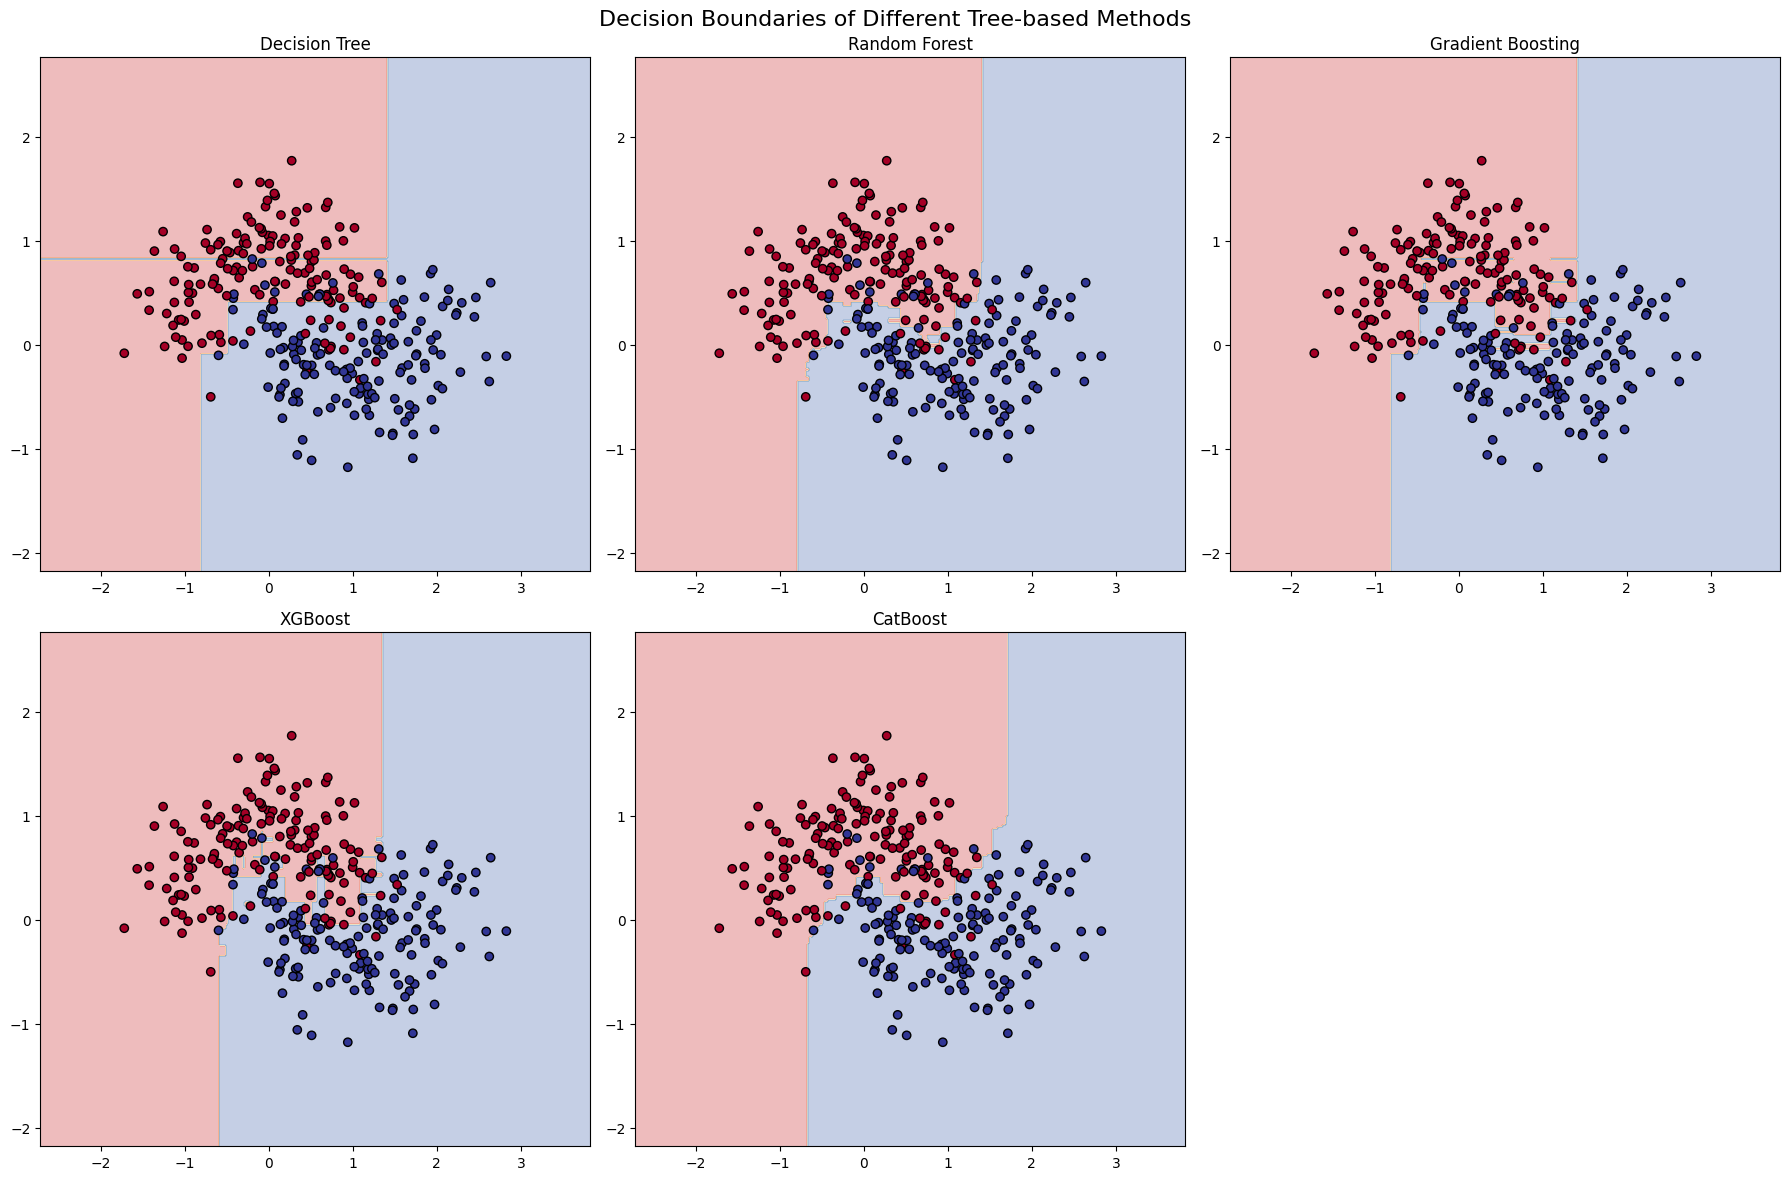


2. ENSEMBLE METHODS PROGRESSION
-----------------------------------


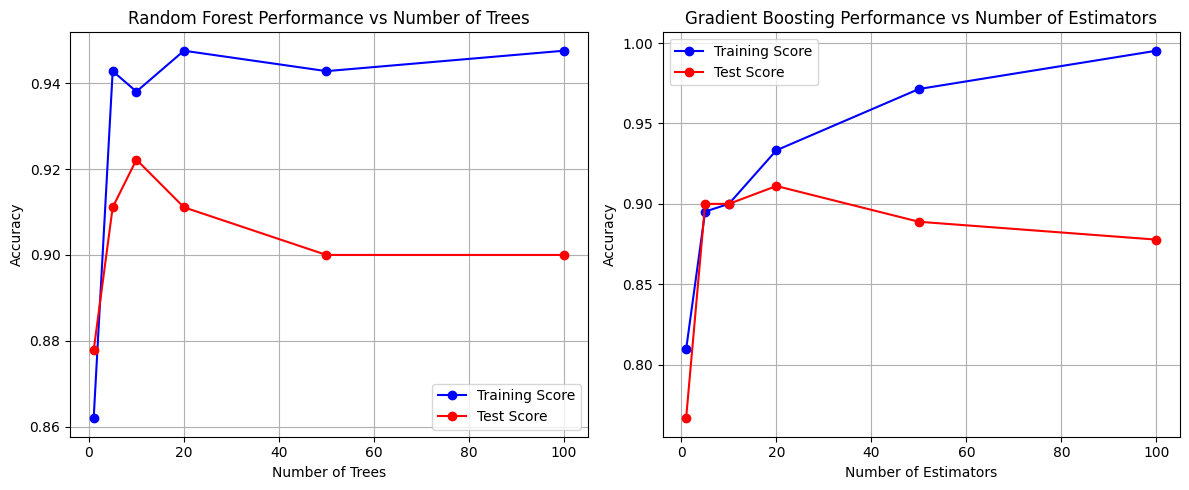


3. TREE STRUCTURE VISUALIZATION
------------------------------


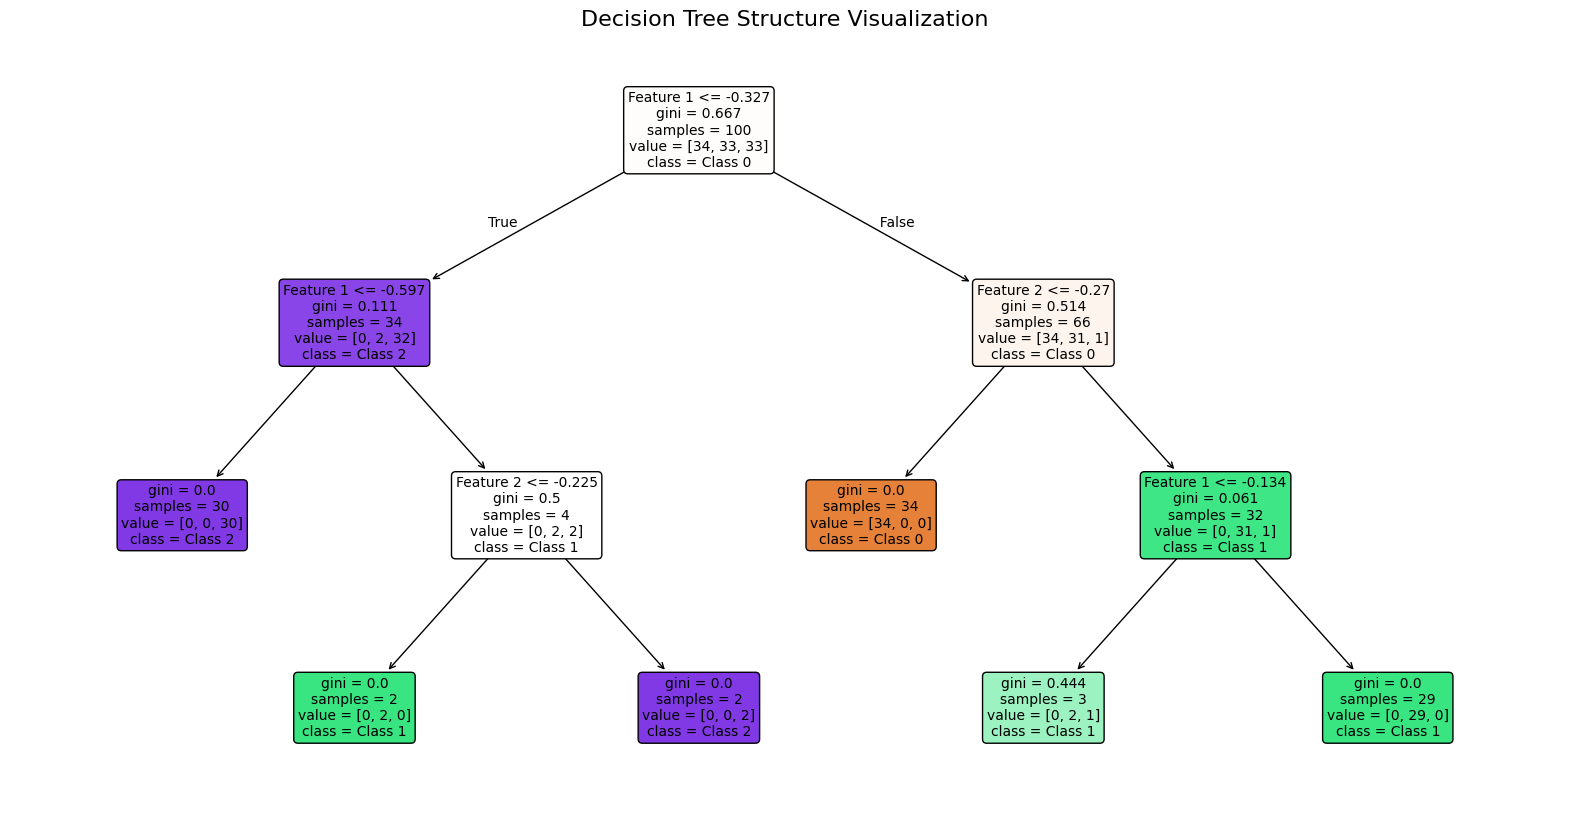


4. FEATURE IMPORTANCE COMPARISON
-----------------------------------


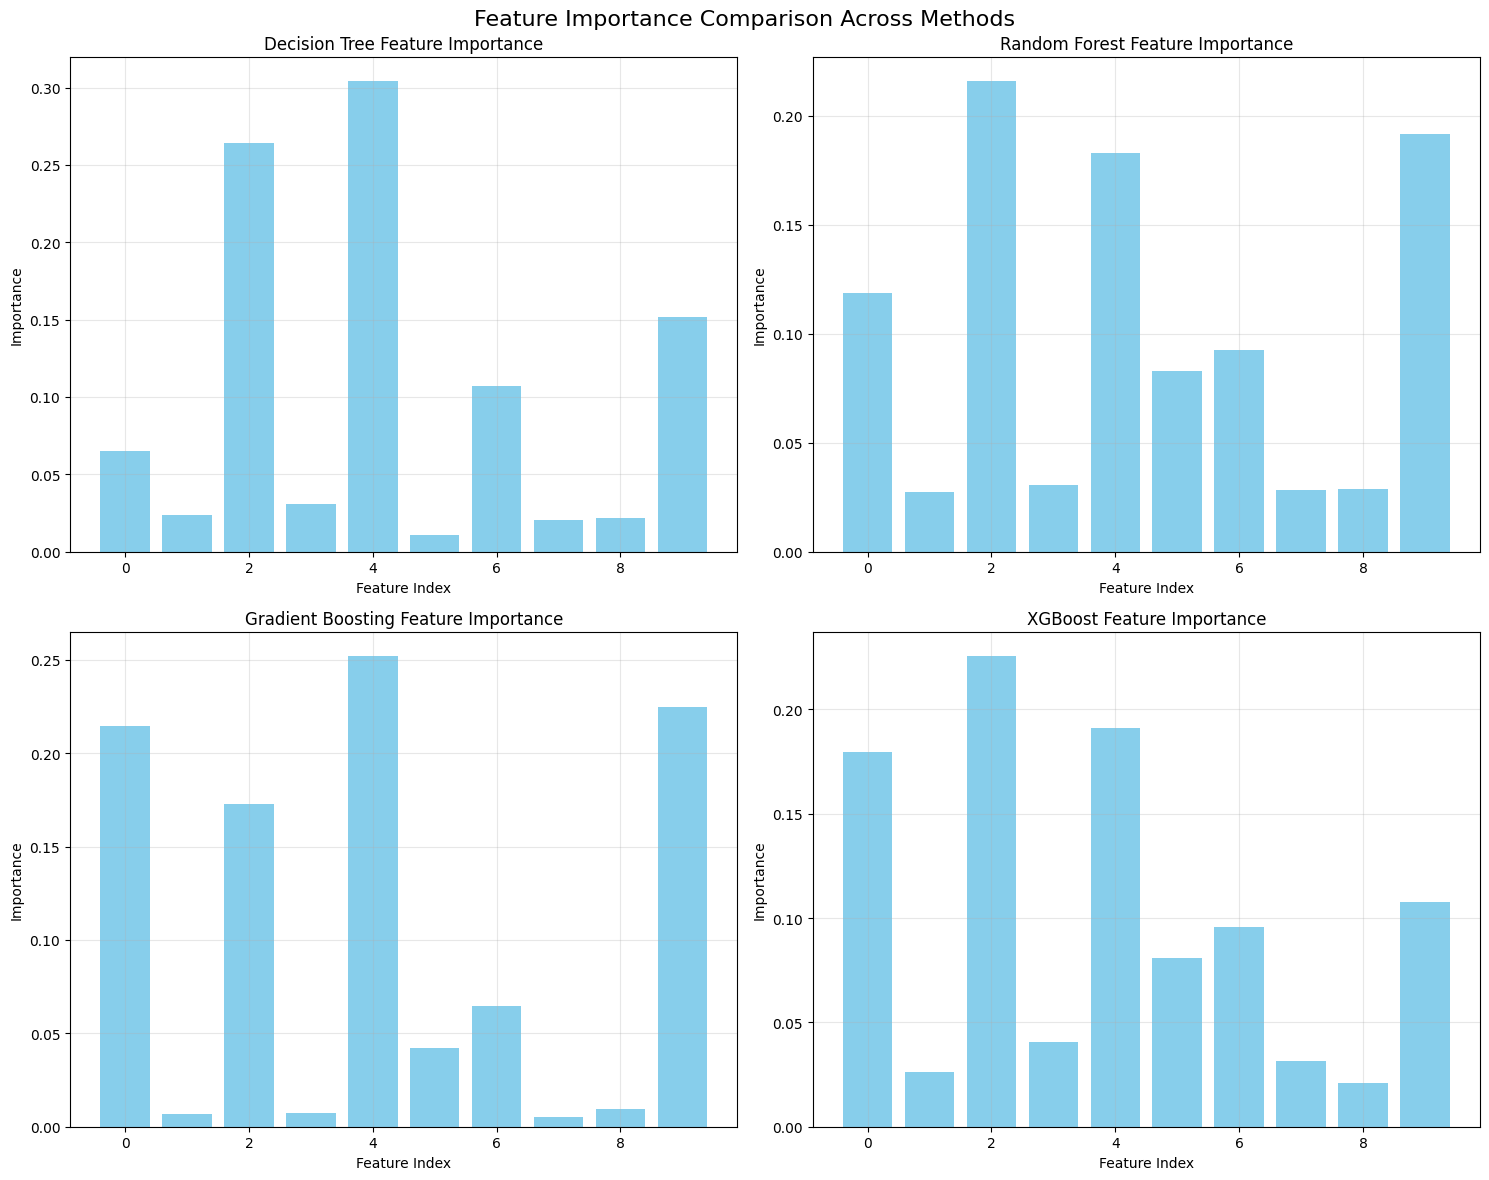


5. BOOSTING SEQUENTIAL LEARNING VISUALIZATION
---------------------------------------------


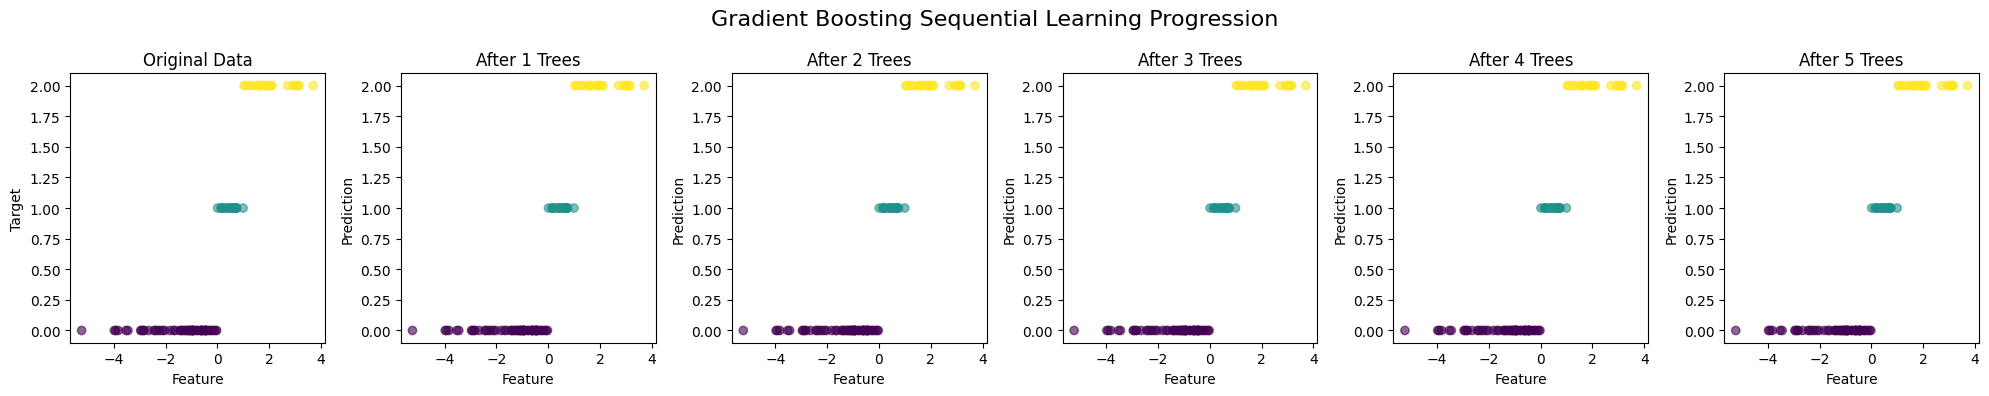


6. OVERFITTING DEMONSTRATION
------------------------------


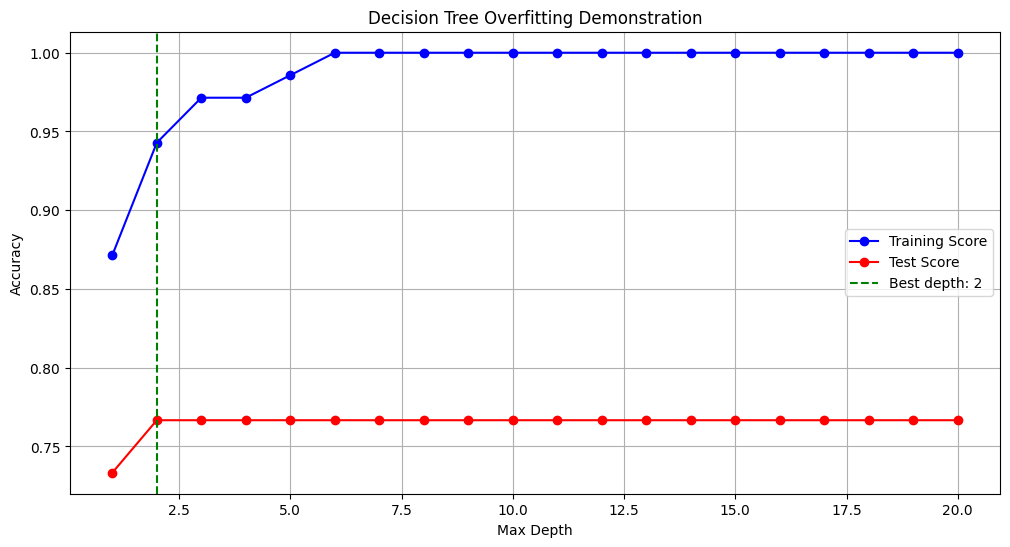


7. ENSEMBLE DIVERSITY VISUALIZATION
--------------------------------------


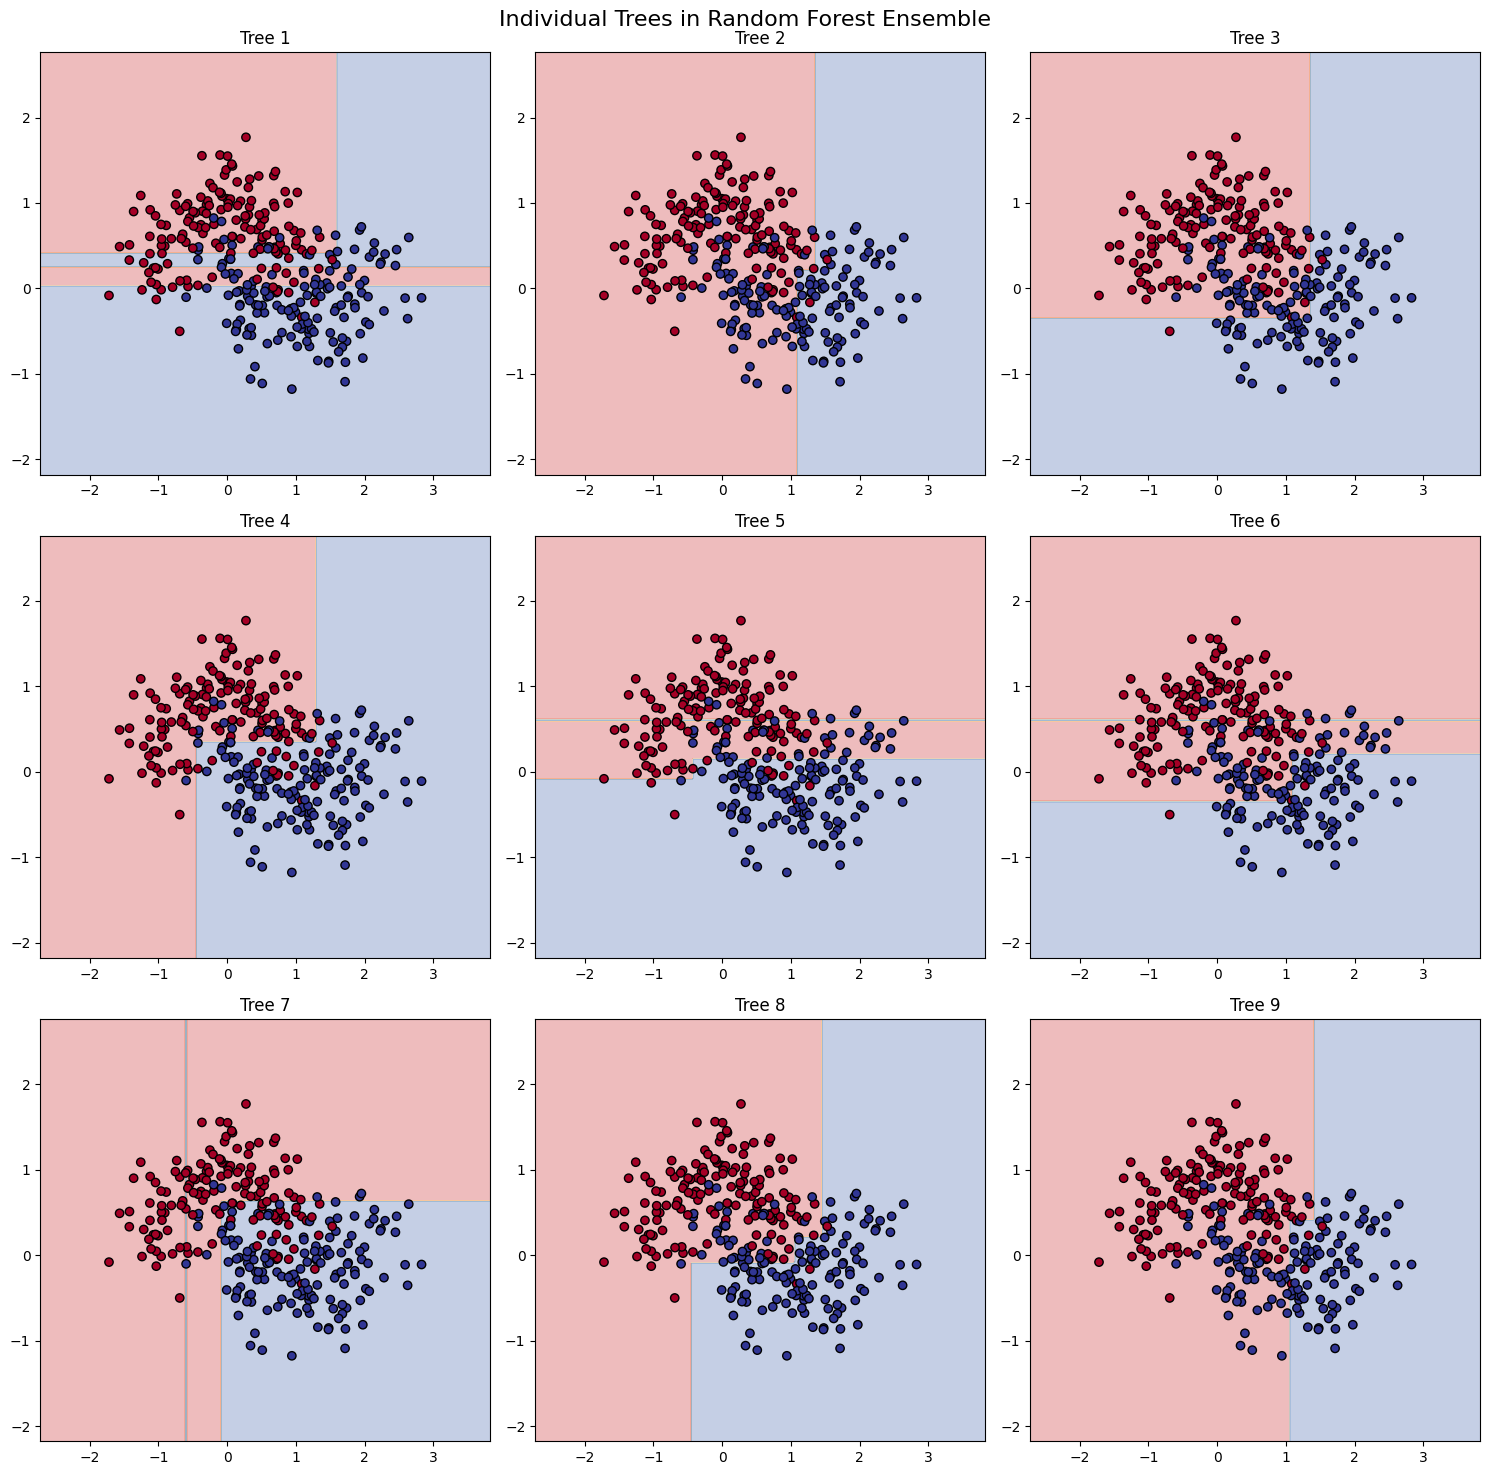


8. PREDICTION CONFIDENCE VISUALIZATION
------------------------------------------


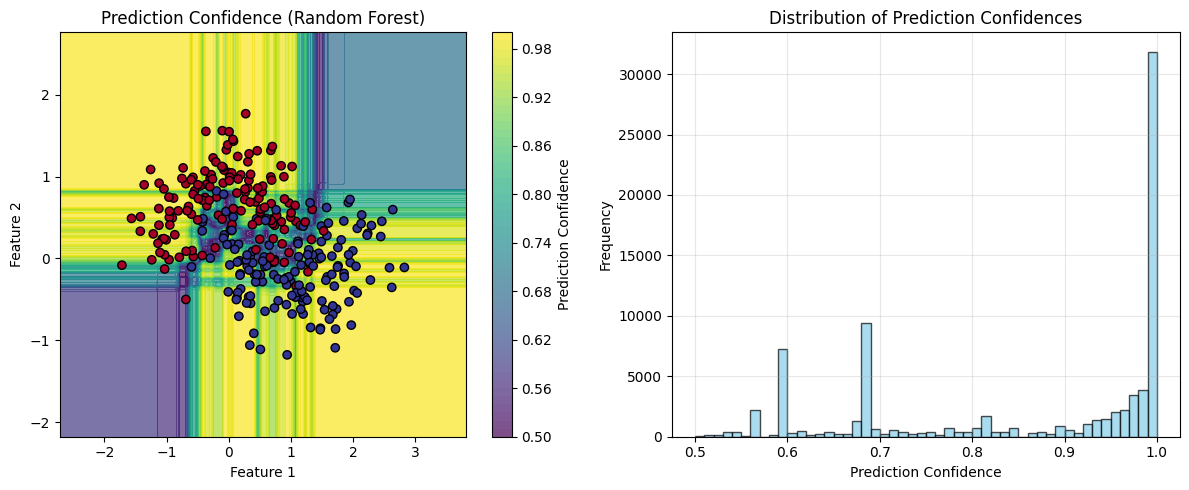


9. CONFUSION MATRICES COMPARISON
-----------------------------------


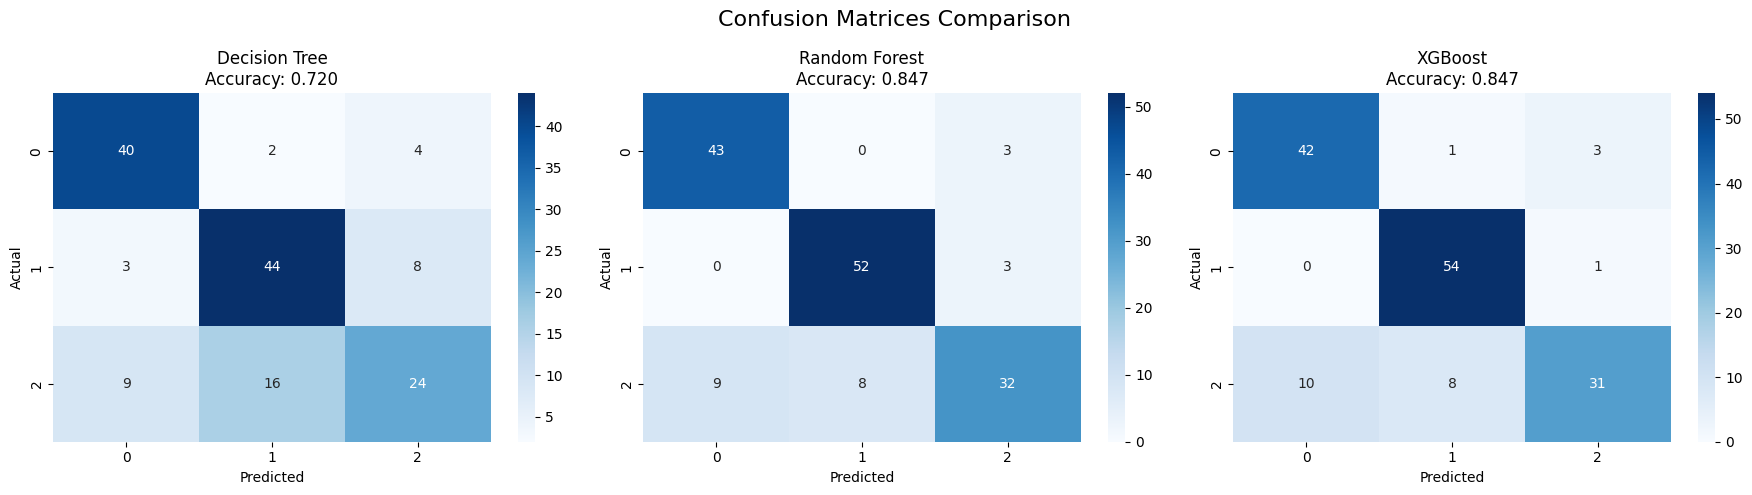


10. LEARNING CURVES
--------------------


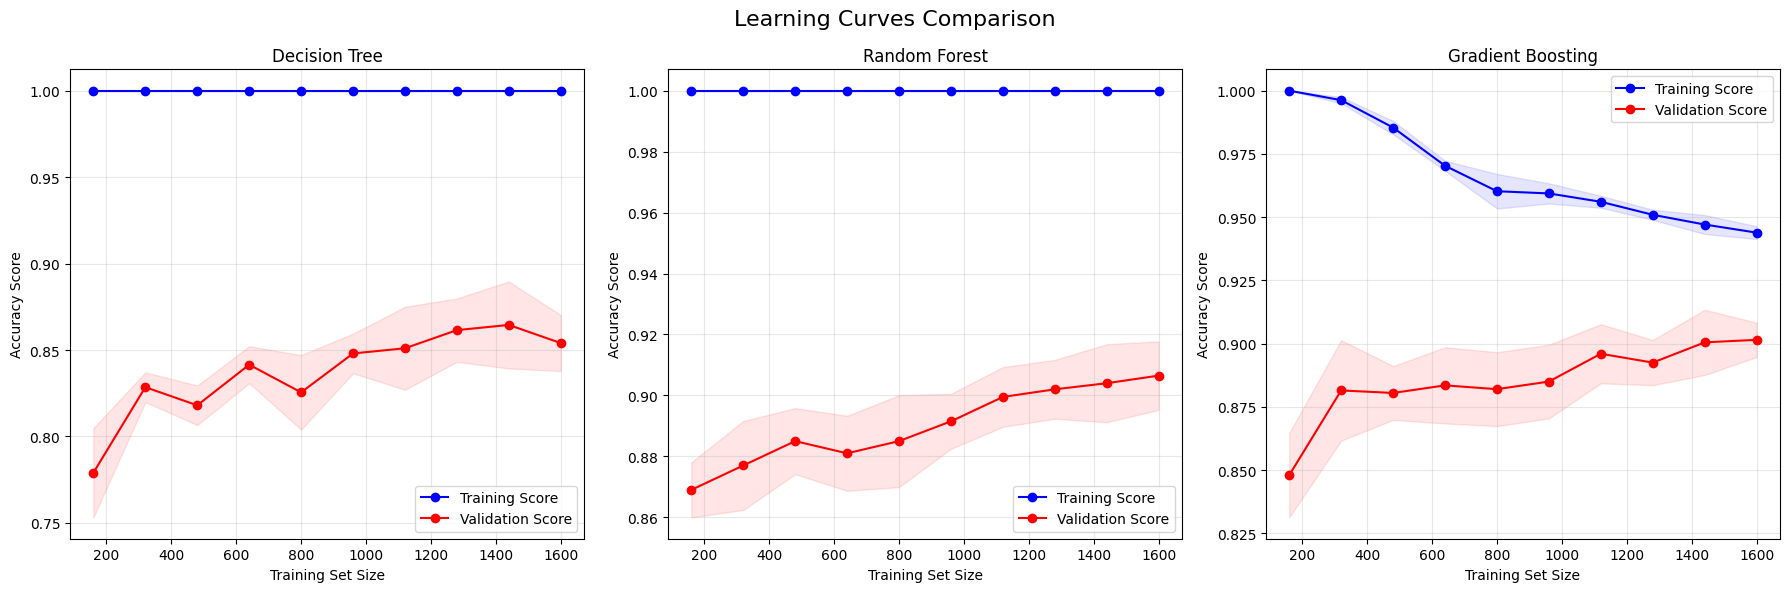


COMPREHENSIVE TREE-BASED METHODS VISUALIZATION COMPLETED!

Key Visualizations Provided:
1. Decision Boundaries - Shows how each method separates classes
2. Ensemble Progression - How performance improves with more trees
3. Tree Structure - Internal structure of decision trees
4. Feature Importance - Which features each method finds important
5. Boosting Progression - Sequential learning in boosting methods
6. Overfitting Demonstration - How tree depth affects performance
7. Ensemble Diversity - Individual trees in a Random Forest
8. Prediction Confidence - How confident models are in predictions
9. Confusion Matrices - Error patterns of different methods
10. Learning Curves - How methods perform with different data sizes


In [4]:


# Set random seed for reproducibility
np.random.seed(42)

print("Tree-based Methods Visualization Example")
print("=" * 50)

# 1. DECISION BOUNDARIES VISUALIZATION
print("\n1. DECISION BOUNDARIES VISUALIZATION")
print("-" * 40)

# Create a simple 2D dataset for visualization
X_vis, y_vis = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Create a mesh for plotting decision boundaries
def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    ax.set_title(title)
    return scatter

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Decision Boundaries of Different Tree-based Methods', fontsize=16)

# Train different models
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=50, max_depth=3, random_state=42),
    'CatBoost': cb.CatBoostClassifier(iterations=50, depth=3, verbose=False, random_seed=42)
}

# Plot decision boundaries
model_names = list(models.keys())
positions = [(0,0), (0,1), (0,2), (1,0), (1,1)]

for i, (name, model) in enumerate(models.items()):
    if name == 'CatBoost':
        model.fit(X_train_vis, y_train_vis, verbose=False)
    else:
        model.fit(X_train_vis, y_train_vis)

    row, col = positions[i]
    scatter = plot_decision_boundary(model, X_vis, y_vis, name, axes[row, col])

# Remove the last subplot
axes[1, 2].remove()

plt.tight_layout()
plt.show()

# 2. ENSEMBLE METHODS PROGRESSION
print("\n2. ENSEMBLE METHODS PROGRESSION")
print("-" * 35)

# Show how Random Forest improves with more trees
n_estimators_range = [1, 5, 10, 20, 50, 100]
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=5, random_state=42)
    rf.fit(X_train_vis, y_train_vis)

    train_score = rf.score(X_train_vis, y_train_vis)
    test_score = rf.score(X_test_vis, y_test_vis)

    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, train_scores, 'o-', label='Training Score', color='blue')
plt.plot(n_estimators_range, test_scores, 'o-', label='Test Score', color='red')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance vs Number of Trees')
plt.legend()
plt.grid(True)

# Show how Gradient Boosting improves with more iterations
n_estimators_range_gb = [1, 5, 10, 20, 50, 100]
train_scores_gb = []
test_scores_gb = []

for n_est in n_estimators_range_gb:
    gb = GradientBoostingClassifier(n_estimators=n_est, max_depth=3, random_state=42)
    gb.fit(X_train_vis, y_train_vis)

    train_score = gb.score(X_train_vis, y_train_vis)
    test_score = gb.score(X_test_vis, y_test_vis)

    train_scores_gb.append(train_score)
    test_scores_gb.append(test_score)

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range_gb, train_scores_gb, 'o-', label='Training Score', color='blue')
plt.plot(n_estimators_range_gb, test_scores_gb, 'o-', label='Test Score', color='red')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting Performance vs Number of Estimators')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 3. TREE STRUCTURE VISUALIZATION
print("\n3. TREE STRUCTURE VISUALIZATION")
print("-" * 30)

# Create a simple dataset for clear tree visualization
X_simple, y_simple = make_classification(n_samples=100, n_features=2, n_redundant=0,
                                       n_informative=2, n_clusters_per_class=1,
                                       n_classes=3, random_state=42)

# Train a simple decision tree
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_simple, y_simple)

# Visualize the tree structure
plt.figure(figsize=(20, 10))
plot_tree(simple_tree, filled=True, feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1', 'Class 2'], rounded=True, fontsize=10)
plt.title("Decision Tree Structure Visualization", fontsize=16)
plt.show()

# 4. FEATURE IMPORTANCE COMPARISON
print("\n4. FEATURE IMPORTANCE COMPARISON")
print("-" * 35)

# Generate dataset with known feature importance
X_imp, y_imp = make_classification(n_samples=1000, n_features=10, n_informative=4,
                                 n_redundant=2, random_state=42)

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.2, random_state=42)

# Train models
models_imp = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Create subplot for feature importance
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Importance Comparison Across Methods', fontsize=16)

axes_flat = axes.flatten()

for i, (name, model) in enumerate(models_imp.items()):
    model.fit(X_train_imp, y_train_imp)
    importance = model.feature_importances_

    axes_flat[i].bar(range(len(importance)), importance, color='skyblue')
    axes_flat[i].set_title(f'{name} Feature Importance')
    axes_flat[i].set_xlabel('Feature Index')
    axes_flat[i].set_ylabel('Importance')
    axes_flat[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. BOOSTING SEQUENTIAL LEARNING VISUALIZATION
print("\n5. BOOSTING SEQUENTIAL LEARNING VISUALIZATION")
print("-" * 45)

# Create a simple dataset for boosting visualization
np.random.seed(42)
X_boost = np.random.randn(100, 1) * 2
y_boost = (X_boost[:, 0] > 0).astype(int) + (X_boost[:, 0] > 1).astype(int) - (X_boost[:, 0] < -1).astype(int)
y_boost = np.clip(y_boost, 0, 2)

# Train Gradient Boosting with few estimators to show progression
gb_viz = GradientBoostingClassifier(n_estimators=5, max_depth=2, learning_rate=0.5, random_state=42)
gb_viz.fit(X_boost, y_boost)

# Plot the progression
fig, axes = plt.subplots(1, 6, figsize=(20, 4))
fig.suptitle('Gradient Boosting Sequential Learning Progression', fontsize=16)

# Original data
axes[0].scatter(X_boost[:, 0], y_boost, alpha=0.6, c=y_boost, cmap='viridis')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature')
axes[0].set_ylabel('Target')

# Show predictions after each stage
for i in range(1, 6):
    # Get predictions up to stage i
    y_pred_partial = gb_viz.staged_predict(X_boost)
    partial_pred = None
    for j, pred in enumerate(y_pred_partial):
        if j == i-1:
            partial_pred = pred
            break

    axes[i].scatter(X_boost[:, 0], partial_pred, alpha=0.6, c=partial_pred, cmap='viridis')
    axes[i].set_title(f'After {i} Trees')
    axes[i].set_xlabel('Feature')
    axes[i].set_ylabel('Prediction')

plt.tight_layout()
plt.show()

# 6. OVERFITTING DEMONSTRATION
print("\n6. OVERFITTING DEMONSTRATION")
print("-" * 30)

# Create a dataset prone to overfitting
X_overfit, y_overfit = make_classification(n_samples=100, n_features=20, n_informative=5,
                                         n_redundant=10, random_state=42)

X_train_of, X_test_of, y_train_of, y_test_of = train_test_split(X_overfit, y_overfit, test_size=0.3, random_state=42)

# Test different max_depth values
depths = range(1, 21)
train_scores_depth = []
test_scores_depth = []

for depth in depths:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train_of, y_train_of)

    train_score = tree.score(X_train_of, y_train_of)
    test_score = tree.score(X_test_of, y_test_of)

    train_scores_depth.append(train_score)
    test_scores_depth.append(test_score)

plt.figure(figsize=(12, 6))
plt.plot(depths, train_scores_depth, 'o-', label='Training Score', color='blue')
plt.plot(depths, test_scores_depth, 'o-', label='Test Score', color='red')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Overfitting Demonstration')
plt.legend()
plt.grid(True)
plt.axvline(x=test_scores_depth.index(max(test_scores_depth))+1,
            color='green', linestyle='--',
            label=f'Best depth: {test_scores_depth.index(max(test_scores_depth))+1}')
plt.legend()
plt.show()

# 7. ENSEMBLE DIVERSITY VISUALIZATION
print("\n7. ENSEMBLE DIVERSITY VISUALIZATION")
print("-" * 38)

# Train Random Forest and show individual tree predictions
rf_diverse = RandomForestClassifier(n_estimators=9, max_depth=3, random_state=42)
rf_diverse.fit(X_train_vis, y_train_vis)

# Create subplot showing individual trees
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Individual Trees in Random Forest Ensemble', fontsize=16)

for i, tree in enumerate(rf_diverse.estimators_[:9]):
    row = i // 3
    col = i % 3
    plot_decision_boundary(tree, X_vis, y_vis, f'Tree {i+1}', axes[row, col])

plt.tight_layout()
plt.show()

# 8. PREDICTION CONFIDENCE VISUALIZATION
print("\n8. PREDICTION CONFIDENCE VISUALIZATION")
print("-" * 42)

# Use the Random Forest to show prediction probabilities
rf_conf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_conf.fit(X_train_vis, y_train_vis)

# Create a mesh for probability visualization
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Get prediction probabilities
Z_proba = rf_conf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_max_proba = np.max(Z_proba, axis=1)
Z_max_proba = Z_max_proba.reshape(xx.shape)

# Plot probability heatmap
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
contour = plt.contourf(xx, yy, Z_max_proba, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Prediction Confidence')
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, cmap='RdYlBu', edgecolors='black')
plt.title('Prediction Confidence (Random Forest)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show histogram of confidences
plt.subplot(1, 2, 2)
plt.hist(Z_max_proba.ravel(), bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Confidences')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. CONFUSION MATRICES COMPARISON
print("\n9. CONFUSION MATRICES COMPARISON")
print("-" * 35)

# Generate a multi-class classification dataset
X_cm, y_cm = make_classification(n_samples=500, n_features=10, n_classes=3,
                               n_informative=5, random_state=42)
X_train_cm, X_test_cm, y_train_cm, y_test_cm = train_test_split(X_cm, y_cm, test_size=0.3, random_state=42)

# Train models
models_cm = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Create confusion matrix subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison', fontsize=16)

for i, (name, model) in enumerate(models_cm.items()):
    model.fit(X_train_cm, y_train_cm)
    y_pred_cm = model.predict(X_test_cm)
    cm = confusion_matrix(y_test_cm, y_pred_cm)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{name}\nAccuracy: {accuracy_score(y_test_cm, y_pred_cm):.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# 10. LEARNING CURVES
print("\n10. LEARNING CURVES")
print("-" * 20)

from sklearn.model_selection import learning_curve

# Generate larger dataset for learning curves
X_lc, y_lc = make_classification(n_samples=2000, n_features=10, n_informative=5, random_state=42)

# Create learning curves for different methods
models_lc = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=42)
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Learning Curves Comparison', fontsize=16)

train_sizes = np.linspace(0.1, 1.0, 10)

for i, (name, model) in enumerate(models_lc.items()):
    train_sizes_abs, train_scores_lc, val_scores_lc = learning_curve(
        model, X_lc, y_lc, train_sizes=train_sizes, cv=5, n_jobs=-1, random_state=42)

    train_mean = np.mean(train_scores_lc, axis=1)
    train_std = np.std(train_scores_lc, axis=1)
    val_mean = np.mean(val_scores_lc, axis=1)
    val_std = np.std(val_scores_lc, axis=1)

    axes[i].plot(train_sizes_abs, train_mean, 'o-', color='blue', label='Training Score')
    axes[i].fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    axes[i].plot(train_sizes_abs, val_mean, 'o-', color='red', label='Validation Score')
    axes[i].fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    axes[i].set_xlabel('Training Set Size')
    axes[i].set_ylabel('Accuracy Score')
    axes[i].set_title(name)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("COMPREHENSIVE TREE-BASED METHODS VISUALIZATION COMPLETED!")
print("="*60)
print("\nKey Visualizations Provided:")
print("1. Decision Boundaries - Shows how each method separates classes")
print("2. Ensemble Progression - How performance improves with more trees")
print("3. Tree Structure - Internal structure of decision trees")
print("4. Feature Importance - Which features each method finds important")
print("5. Boosting Progression - Sequential learning in boosting methods")
print("6. Overfitting Demonstration - How tree depth affects performance")
print("7. Ensemble Diversity - Individual trees in a Random Forest")
print("8. Prediction Confidence - How confident models are in predictions")
print("9. Confusion Matrices - Error patterns of different methods")
print("10. Learning Curves - How methods perform with different data sizes")

### How Random Forest Works

A Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

Here's a breakdown of the key concepts:

1.  **Bagging (Bootstrap Aggregating):**
    *   Random Forest uses bagging to create different subsets of the training data. It draws random samples of the data *with replacement*. This means some data points may be included multiple times in a subset, while others may not be included at all.
    *   Each decision tree in the forest is trained on one of these bootstrapped subsets. This introduces randomness and helps reduce variance.

2.  **Random Feature Selection:**
    *   When building each individual decision tree, Random Forest doesn't consider all features at each split. Instead, it randomly selects a subset of features.
    *   This further diversifies the trees and helps prevent them from becoming too similar or relying too heavily on a single dominant feature.

3.  **Building the Trees:**
    *   For each bootstrapped dataset and selected subset of features, a decision tree is grown. These trees are typically grown to their maximum depth or until a stopping criterion is met. They are not pruned.

4.  **Aggregation:**
    *   Once all the trees are built, the Random Forest makes a prediction by combining the predictions of individual trees.
    *   For **classification**, the final prediction is the class that receives the most votes from the individual trees (majority voting).
    *   For **regression**, the final prediction is the average of the predictions from all the individual trees.

**Why it works:**

*   **Reduces Overfitting:** By training on different subsets of data and features, individual trees are less likely to overfit the training data.
*   **Increases Robustness:** The combined prediction from multiple diverse trees is more robust to noise and outliers.
*   **Improved Accuracy:** The ensemble of trees generally performs better than a single decision tree.

This code demonstrates the core concepts of Bagging and Random Feature Selection used in Random Forests.

- **Bagging:** Shows how random samples of the data are drawn *with replacement* to create different training sets for individual trees.
- **Random Feature Selection:** Illustrates how a random subset of features is selected at each split when building a tree.

These two mechanisms introduce randomness and diversity among the trees in the forest, which helps to reduce overfitting and improve the overall robustness and accuracy of the model.

In [5]:
# Demonstrate Bagging
np.random.seed(42)
X_bagging = np.arange(10).reshape(-1, 1)
y_bagging = np.array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

print("Original Data:")
print(f"X: {X_bagging.flatten()}")
print(f"y: {y_bagging}")

print("\nBagged Samples (with replacement):")
for i in range(3):
    sample_indices = np.random.choice(len(X_bagging), size=len(X_bagging), replace=True)
    X_sample = X_bagging[sample_indices]
    y_sample = y_bagging[sample_indices]
    print(f"Sample {i+1}: X={X_sample.flatten()}, y={y_sample}")

# Demonstrate Random Feature Selection
np.random.seed(42)
X_features, y_features = make_classification(n_samples=100, n_features=5, n_informative=3, random_state=42)

print("\nOriginal Features Shape:", X_features.shape)

print("Random Feature Subsets:")
for i in range(3):
    # Randomly select a subset of features (e.g., 3 features)
    feature_indices = np.random.choice(X_features.shape[1], size=3, replace=False)
    X_subset = X_features[:, feature_indices]
    print(f"Subset {i+1}: Feature Indices={feature_indices}, Shape={X_subset.shape}")

Original Data:
X: [0 1 2 3 4 5 6 7 8 9]
y: [0 0 0 1 1 1 0 0 1 1]

Bagged Samples (with replacement):
Sample 1: X=[6 3 7 4 6 9 2 6 7 4], y=[0 1 0 1 0 1 0 0 0 1]
Sample 2: X=[3 7 7 2 5 4 1 7 5 1], y=[1 0 0 0 1 1 0 0 1 0]
Sample 3: X=[4 0 9 5 8 0 9 2 6 3], y=[1 0 1 1 1 0 1 0 0 1]

Original Features Shape: (100, 5)
Random Feature Subsets:
Subset 1: Feature Indices=[1 4 2], Shape=(100, 3)
Subset 2: Feature Indices=[3 1 2], Shape=(100, 3)
Subset 3: Feature Indices=[1 0 3], Shape=(100, 3)


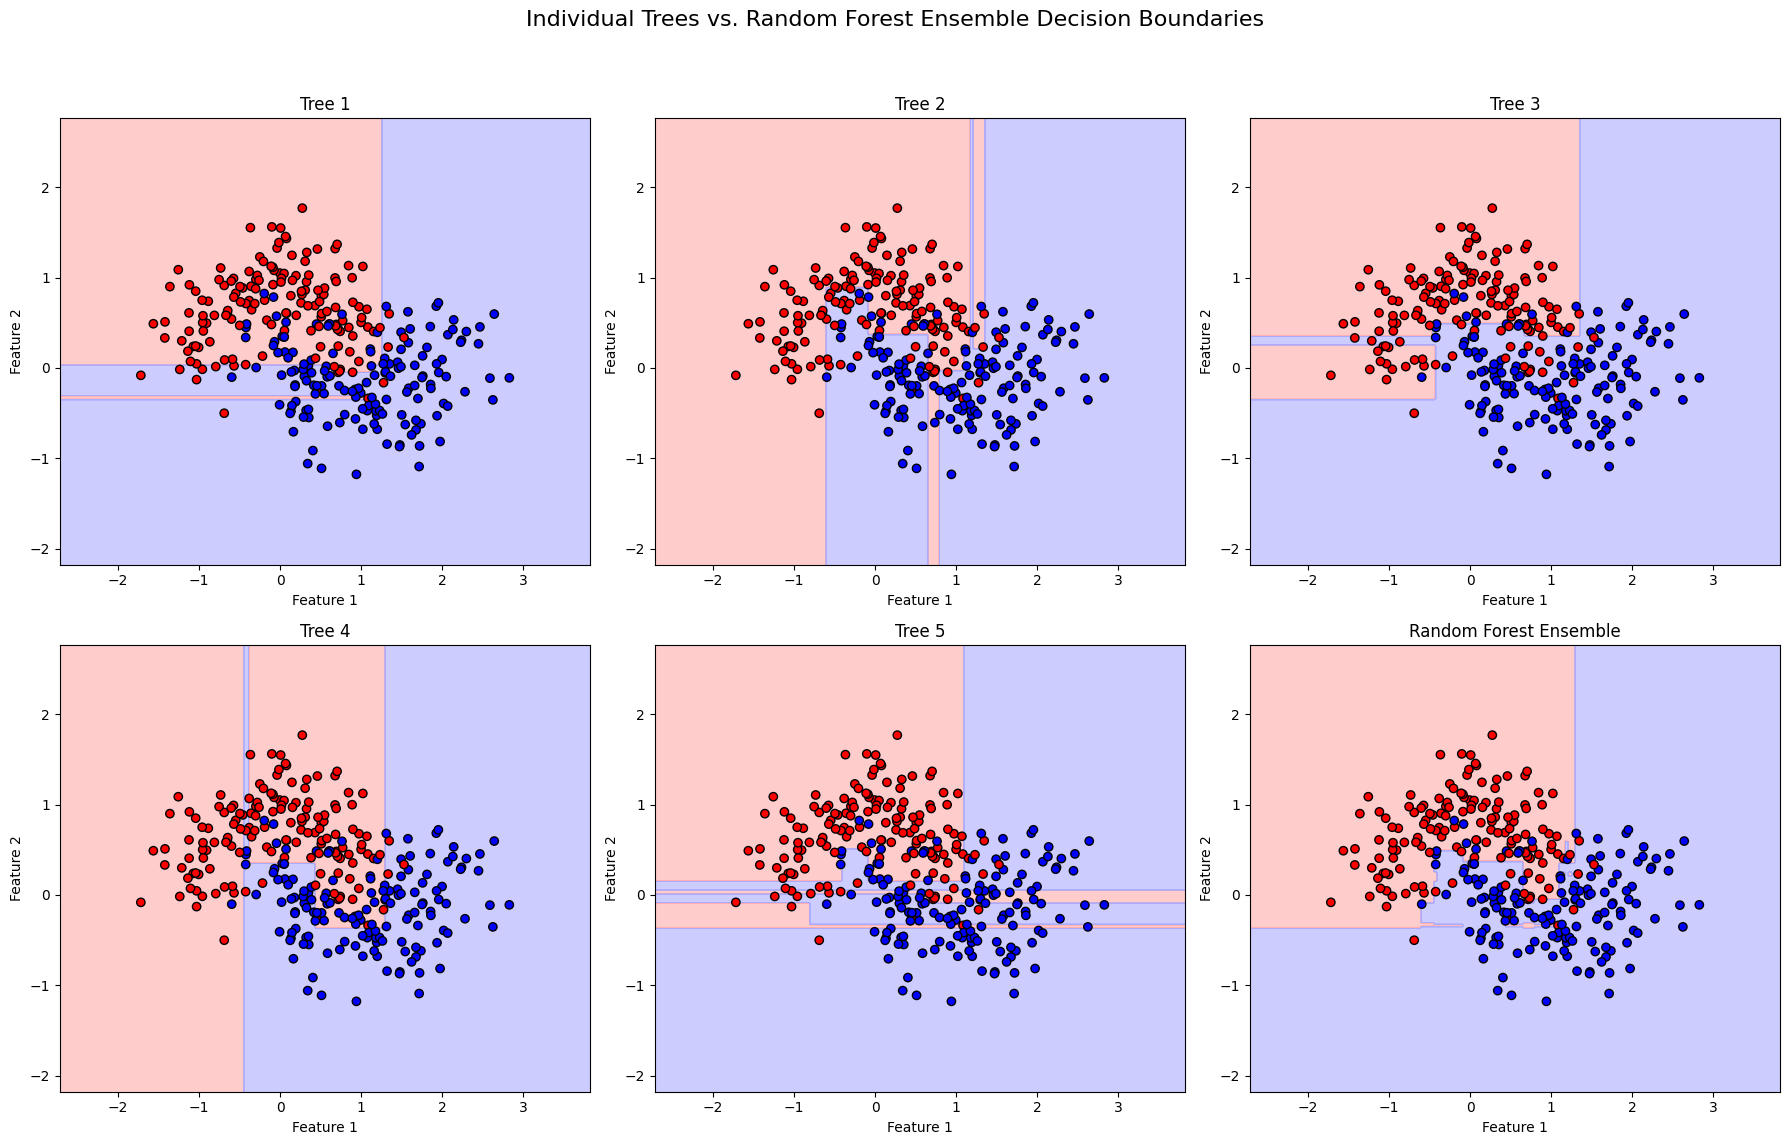

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Re-using the make_moons dataset for consistency
X_vis, y_vis = make_moons(n_samples=300, noise=0.3, random_state=42)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42)

# Helper function to plot decision boundaries (re-using the one defined earlier)
def plot_decision_boundary(model, X, y, title, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap = ListedColormap(['#FFAAAA', '#AAAAFF']) # Custom colormap for binary classes
    scatter_cmap = ListedColormap(['#FF0000', '#0000FF']) # Custom colormap for data points

    ax.contourf(xx, yy, Z, alpha=0.6, cmap=cmap)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=scatter_cmap, edgecolors='black')
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    return scatter

# Train a small Random Forest
n_estimators_viz = 5 # Number of trees to visualize
rf_viz = RandomForestClassifier(n_estimators=n_estimators_viz, max_depth=5, random_state=42)
rf_viz.fit(X_train_vis, y_train_vis)

# Create subplots to show individual trees and the ensemble
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Individual Trees vs. Random Forest Ensemble Decision Boundaries', fontsize=16)

axes_flat = axes.flatten()

# Plot individual tree decision boundaries
for i, tree in enumerate(rf_viz.estimators_):
    plot_decision_boundary(tree, X_vis, y_vis, f'Tree {i+1}', axes_flat[i])

# Plot the Random Forest ensemble decision boundary
plot_decision_boundary(rf_viz, X_vis, y_vis, 'Random Forest Ensemble', axes_flat[n_estimators_viz])

# Hide the last subplot if n_estimators_viz is less than the total number of subplots
if n_estimators_viz < len(axes_flat) - 1:
    for j in range(n_estimators_viz + 1, len(axes_flat)):
        fig.delaxes(axes_flat[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

In the plot titled "Individual Trees vs. Random Forest Ensemble Decision Boundaries":

Tree 1, Tree 2, Tree 3, Tree 4, Tree 5 represent the decision boundaries of individual decision trees that make up the Random Forest. Remember that a Random Forest is an ensemble of many decision trees. Each of these trees is trained on a slightly different subset of the data (due to bagging) and considers a random subset of features at each split. This is why their decision boundaries are different from each other.
The plot labeled Random Forest Ensemble shows the combined decision boundary of all these individual trees. The Random Forest makes its final prediction by averaging the predictions of these individual trees (for regression) or taking a majority vote (for classification, as in this example).
How to tell the Ensemble method is better from this visualization:

Look at the decision boundary of the "Random Forest Ensemble" plot compared to the individual "Tree" plots.

The individual trees often have very rigid, axis-aligned boundaries that can be sensitive to small changes in the data. They might overfit to specific patterns in their training subset.
The Random Forest Ensemble boundary is much smoother and more generalized. It captures the overall shape of the data distribution better than any single tree.
While this specific visualization focuses on the decision boundary shape, the previous Ensemble Methods Progression plot (the one showing Training and Test Scores vs. Number of Trees/Estimators) directly shows that the Test Score (which indicates performance on unseen data) generally increases and stabilizes as more trees are added to the Random Forest. This improvement in test score is a quantitative measure showing that the ensemble performs better than a single tree (which would be equivalent to a Random Forest with just 1 tree).

So, the decision boundary visualization gives you a visual intuition of why it's better (smoother, more generalized boundary), and the performance plots give you the quantitative evidence (higher test accuracy).

Imagine the Random Forest is like a team of experts trying to make a decision. Each Tree 1, Tree 2, Tree 3, etc. is one individual expert.

Each expert (tree) looks at the problem (the data) from a slightly different angle because they have slightly different information (bagging) and focus on different aspects (random feature selection).
Because they have different perspectives, they might make slightly different predictions or draw different lines (decision boundaries) to separate the data.
The Random Forest Ensemble is the final decision made by the entire team of experts. They combine their individual opinions (predictions) to arrive at a final, more reliable answer.
The plot shows you what each individual expert (tree) thinks, and then what the final, combined decision of the team (the ensemble) looks like.

The ensemble is usually better because:

Errors of individual experts cancel out: If one tree makes a mistake in one area, another tree might get it right, and when you average or vote, the mistakes tend to be smoothed out.
More robust: The final decision is less influenced by the quirks or noise in any single tree's view of the data.